# Введение в методы сбора и обработки данных
## Добашнее задание к седьмому уроку "Открытые данные"

 ### Задание 1
 Создать приложение, которое будет из готового файла с данными «Сбербанка» (https://www.sberbank.com/ru/analytics/opendata) выводить результат по параметрам: 
 * Тип данных 
 * Интервал дат 
 * Область

In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### Решение

Загрузим cvs в датасет pandas

In [ ]:
df = pd.read_csv('opendata.csv', encoding='cp1251')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74842 entries, 0 to 74841
Data columns (total 4 columns):
name      74842 non-null object
region    74842 non-null object
date      74842 non-null datetime64[ns]
value     74842 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB


Переведем признак `date` в тип `datetime`

In [103]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

Реализуем функции получения результата по запросу пользователя.

In [102]:
def get_user_request_data(df):
    # Получение списков регионов и целевыхтаблиц
    data_types = df.name.value_counts().index
    data_regions = df.region.value_counts().index

    
    # Запрос пользователя об интересующем его типе данных
    i = 1
    print("Выберете тип данных:")
    for dtype in data_types:
        print(f"{i}) {dtype}")
        i += 1
    dtype_index = int(input(f"[1-{i-1}]: ")) - 1


    # Запрос пользователя об интересующем его регионе
    i = 1
    print("\n\nВыберите регион:")
    for dregion in data_regions:
        print(f"{i}) {dregion}")
        i += 1
    dregion_index = int(input(f"[1-{i-1}]: ")) - 1

    print(f"Регион - {data_regions[dregion_index]}\nТип - {data_types[dtype_index]}")

    date_min = df.date.min()
    date_max = df.date.max()

    # Запрос пользователя об интересующем его временном интервале
    print(f"Данные по временному периоду от {date_min} до {date_max}")
    ts_left = input("Укажите начало временного периода [гггг-мм-дд]: ")
    ts_right = input("Укажите кеноц временного периода [гггг-мм-дд]: ")
    
    selected_df = df.loc[df.region == data_regions[dregion_index]].loc[df.name == data_types[dtype_index]]
    selected_df = selected_df.loc[df.date > ts_left].loc[df.date < ts_right ]
    
    return selected_df

In [132]:
df2 = get_user_request_data(df) 

Выберете тип данных:
1) Средняя сумма заявки на потребительский кредит
2) Количество заявок на потребительские кредиты
3) Количество заявок на ипотечные кредиты
4) Средняя сумма заявки на ипотечный кредит
5) В среднем руб. на текущем счете на человека
6) Средняя пенсия
7) Средние расходы по картам
8) В среднем депозитов в руб. на человека
9) Средняя сумма нового депозита
10) Количество новых депозитов
11) Средняя зарплата
12) Средние траты в ресторане
13) Средний чек в формате Ресторан
14) Средние траты в ресторане фастфуд
15) Средний чек в формате Фастфуд
[1-15]: 3


Выберите регион:
1) Липецкая область
2) Республика Алтай (Горный Алтай)
3) Красноярский край
4) Свердловская область
5) Республика Саха (Якутия)
6) Тульская область
7) Новгородская область
8) Псковская область
9) Волгоградская область
10) Ростовская область
11) Воронежская область
12) Ивановская область
13) Удмуртская Республика
14) Камчатский край
15) Республика Коми
16) Чувашская Республика
17) Ненецкий автономный округ

In [134]:
df2.head(5)

,name,region,date,value
14324,Количество заявок на ипотечные кредиты,Магаданская область,2014-05-15,118
14325,Количество заявок на ипотечные кредиты,Магаданская область,2014-06-15,147
14326,Количество заявок на ипотечные кредиты,Магаданская область,2014-07-15,123
14327,Количество заявок на ипотечные кредиты,Магаданская область,2014-08-15,105
14328,Количество заявок на ипотечные кредиты,Магаданская область,2014-09-15,131


### Задача 2
Визуализировать выводимые данные с помощью графика
#### Решение

Напишем функцию которая строит график по получившимуся датасету

In [136]:
def visualise_dataframe(df):
    # Задаем размер графика, подписываем его
    plt.figure(figsize=(20,10))
    plt.xlabel('Дата')
    df_type = df.name.tolist()[0]
    df_region = df.region.tolist()[0]
    plt.title(f'{df_type} в регионе {df_region}')
    
    # Нарисуем график
    plt.plot(df['date'], df['value'])
    plt.show();

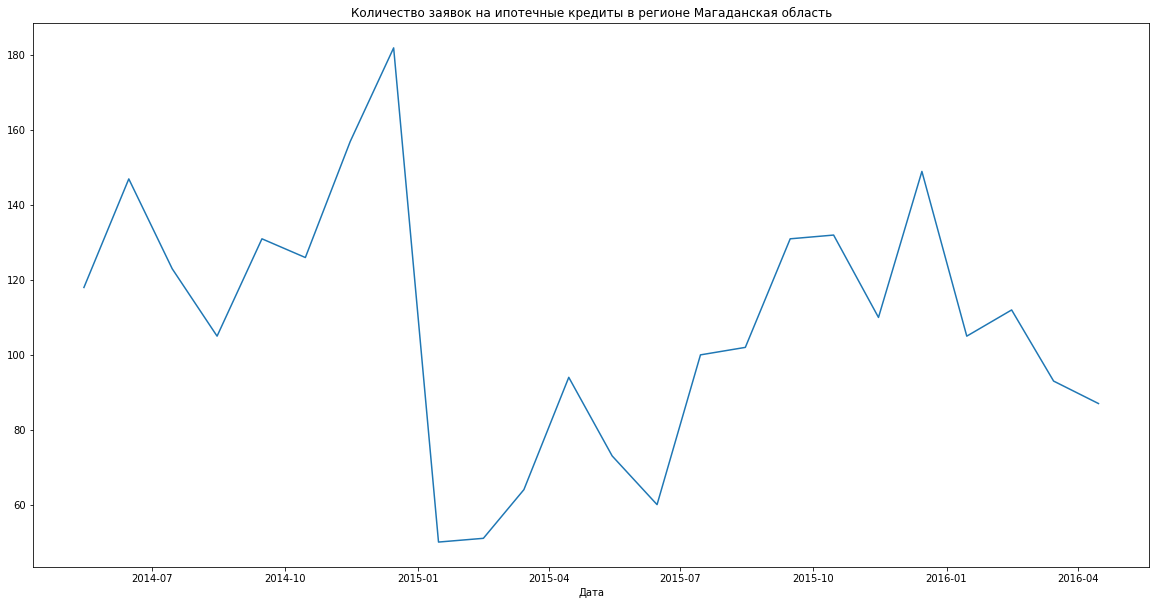

In [137]:
visualise_dataframe(df2)